**UNAD**
**Alexander chacon**
**Agrupamiento en K-means**

In [41]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Cargar el dataset
df = pd.read_csv('C:/Users/user/OneDrive - Universidad Nacional Abierta y a Distancia/Documents/UNAD_ALEX/OCTAVO SEMESTRE/ANALISIS DE DATOS/TAREA_4/Mall_Customers.csv')

In [7]:
# Mostrar las primeras filas del dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
# Descripción estadística del dataset
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [11]:
# Información del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


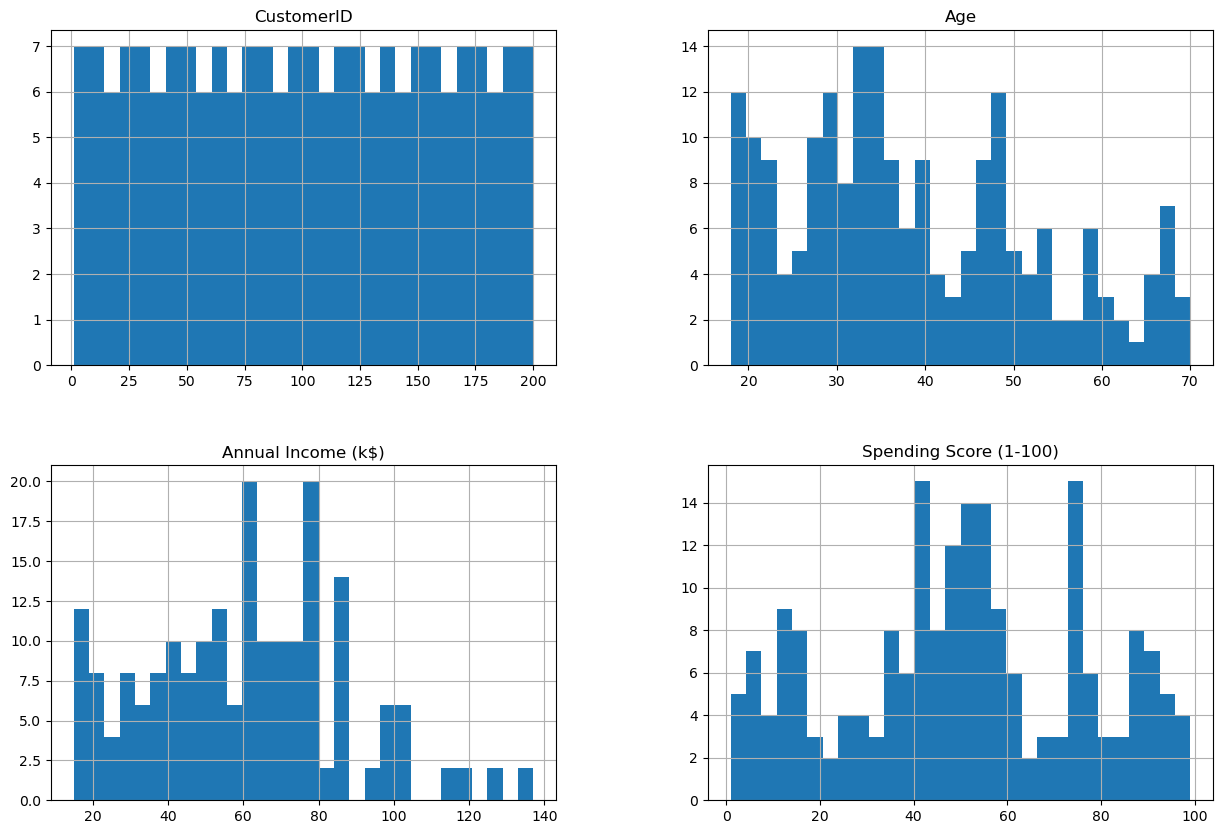

In [13]:
# Visualización de la distribución de las variables
df.hist(bins=30, figsize=(15, 10))
plt.show()

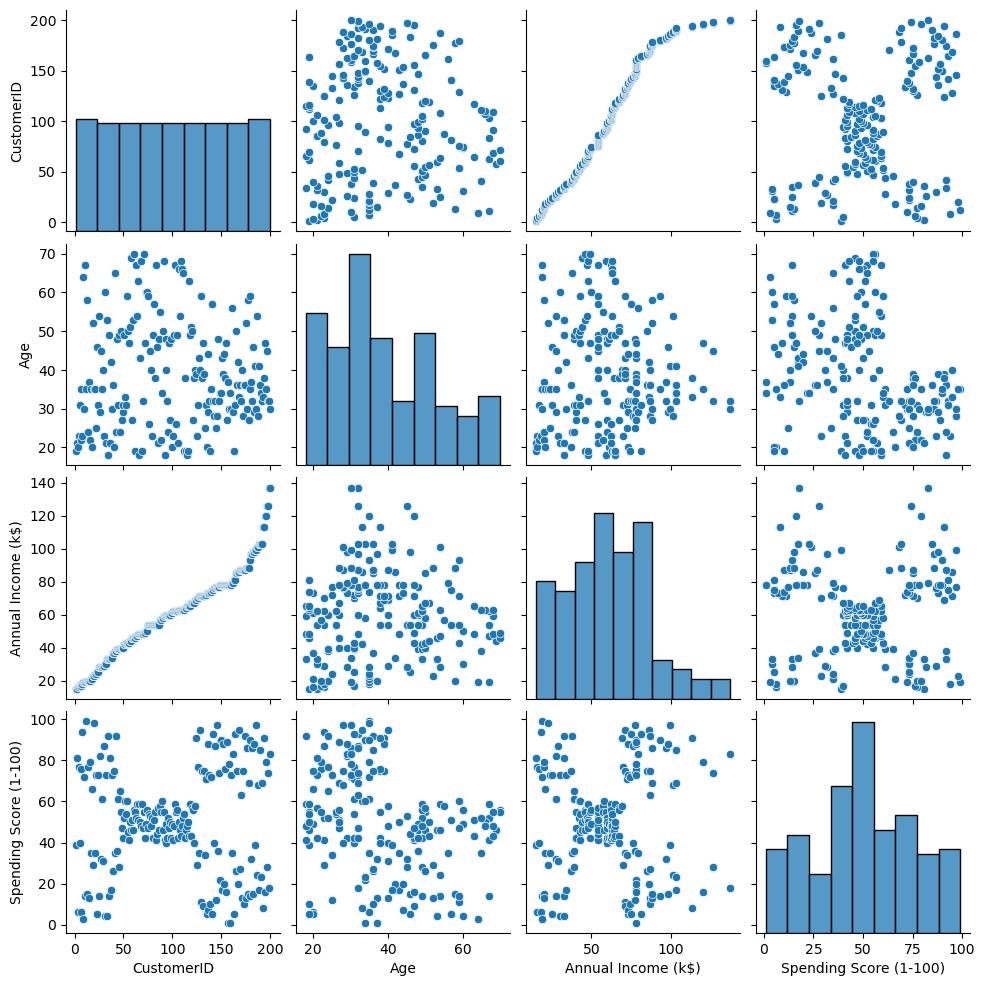

In [15]:
# Visualización de relaciones entre variables
sns.pairplot(df)
plt.show()

In [79]:
# Verificar valores faltantes
print(df.isnull().sum())

CustomerID                0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Gender_Male               0
Cluster                   0
dtype: int64


In [81]:
# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, drop_first=True)

# Verificar la conversión
print(df.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0           1   19                  15                      39         True   
1           2   21                  15                      81         True   
2           3   20                  16                       6        False   
3           4   23                  16                      77        False   
4           5   31                  17                      40        False   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [83]:
# Estandarizar las características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convertir a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [35]:
# Usar PCA para reducir la dimensionalidad y seleccionar características relevantes
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
df_pca = pca.fit_transform(df_scaled)

In [37]:
# Convertir a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

In [67]:
# Asegurarse de que los índices coincidan
df_pca.index = df.index

In [69]:
# Combinar los DataFrames
df_combined = pd.concat([df, df_pca], axis=1)

In [71]:
# Verificar la definición de df_combined
print(df_combined.head())

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male  \
0           1   19                  15                      39         True   
1           2   21                  15                      81         True   
2           3   20                  16                       6        False   
3           4   23                  16                      77        False   
4           5   31                  17                      40        False   

   Cluster      PCA1      PCA2  
0        2 -2.316965 -0.454190  
1        2 -2.272391 -1.474104  
2        2 -2.454223 -0.006922  
3        2 -2.386461 -1.749935  
4        2 -2.397377 -0.369341  


In [43]:
# Determinar el número óptimo de clústeres usando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

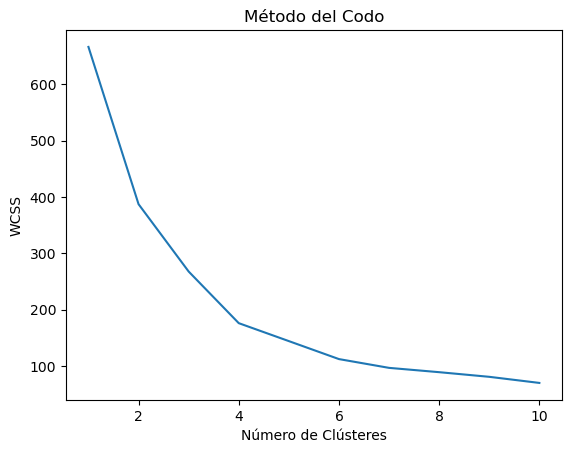

In [45]:
# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.show()

In [47]:
# Entrenar el modelo K-means con el número óptimo de clústeres (por ejemplo, 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [49]:
# Asignar los clústeres a los datos
df['Cluster'] = kmeans.labels_

In [51]:
# Calcular el Coeficiente de Silhouette
silhouette_avg = silhouette_score(df_pca, kmeans.labels_)
print(f'Coeficiente de Silhouette: {silhouette_avg}')

Coeficiente de Silhouette: 0.37051752261694376


In [53]:
# Calcular el Índice de Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(df_pca, kmeans.labels_)
print(f'Índice de Calinski-Harabasz: {calinski_harabasz}')

Índice de Calinski-Harabasz: 146.79897831777458


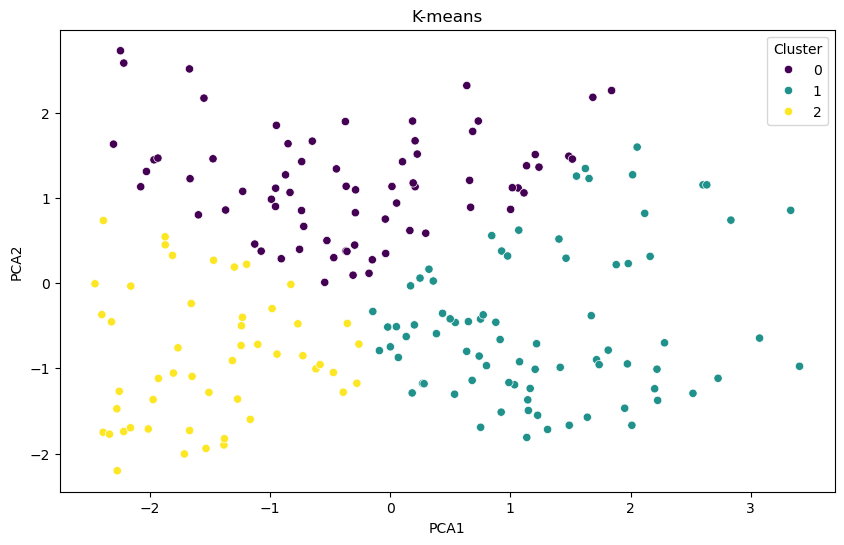

In [75]:
# Visualización de los clústeres
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_combined, palette='viridis')
plt.title('K-means')
plt.show()